In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as LA
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from numpy import random
from sklearn.mixture import GaussianMixture

In [2]:
from tabulate import tabulate
def plotTable(clms, clmDataHeadears, alignSize):
  data = []
  
  for i in range(len(clms[list(clms.keys())[0]])):
      dataElement = []
      for key in clms.keys():
          dataElement.append(clms[key][i])
      data.append(dataElement)
      
  print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                  colalign=["center"]*alignSize))

In [3]:
PI = np.pi
Exp = np.exp

In [4]:
def plot_features(feature1, feature2, data_set, labels, ax):
  ax = ax or plt.gca()
  colors = ['r','g', 'gold']
  for _label, _color in zip(labels, colors):
    data = data_set[data_set['species']==_label]
    _feature1 = data[feature1].values;  _feature2 = data[feature2].values
    ax.scatter(_feature1, _feature2, label = _label, color = _color)
    ax.set_xlabel(feature1); ax.set_ylabel(feature2); ax.set_title(feature1 + ' VS ' + feature2)
  ax.legend(loc = 'upper right')

In [5]:
def guassian_contours(mean, cov,_color, ax):
  if cov.shape == (2,2):
    U, S, Vt = LA.svd(cov)
    ang = np.arctan2(U[1][0], U[0][0])*180/PI
    w,h = 2*np.sqrt(S)
  else:
    angle = 0
    w, h = 2*np.sqrt(cov)
  for k in range(1,3):
     ellipse = Ellipse(mean, width = k*w, height = k*h, angle = ang, alpha = 0.2 , color = _color)
     ax.add_patch(ellipse)

In [6]:
def plot_data_dist(data,colors, labels, model, ax, arr = False):
  ax = ax or plt.gca()
  for label, _color in zip(labels, colors):
    data_class = data[data['species'] == label]
    data_class = data_class.drop(columns = 'species')
    data_class = data_class.values
    ax.scatter(data_class[:,0], data_class[:,1], color = _color)
    break
  cov_tmp_mat = model.covariances_
  mean_mat = model.means_
  if (arr):
    guassian_contours(mean_mat, cov_tmp_mat, ax)
  else:
    for mean, cov_tmp in zip(mean_mat, cov_tmp_mat):
        guassian_contours(mean, cov_tmp, _color, ax)

In [7]:
def estimate_dist(feature1, feature2, data_set, species, component_number):
  models = []
  for label in species:
      data = data_set[data_set['species']==label]
      gmm_model = GaussianMixture(n_components = component_number, max_iter = 200, covariance_type = 'full')
      gmm_model.fit(data[[feature1, feature2]].values)
      models.append(gmm_model)
  return models

**Load Data**

In [10]:
data_set = pd.read_csv('/content/drive/MyDrive/ML_Hw_3/penguins.csv')
data_set

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Plot Features**

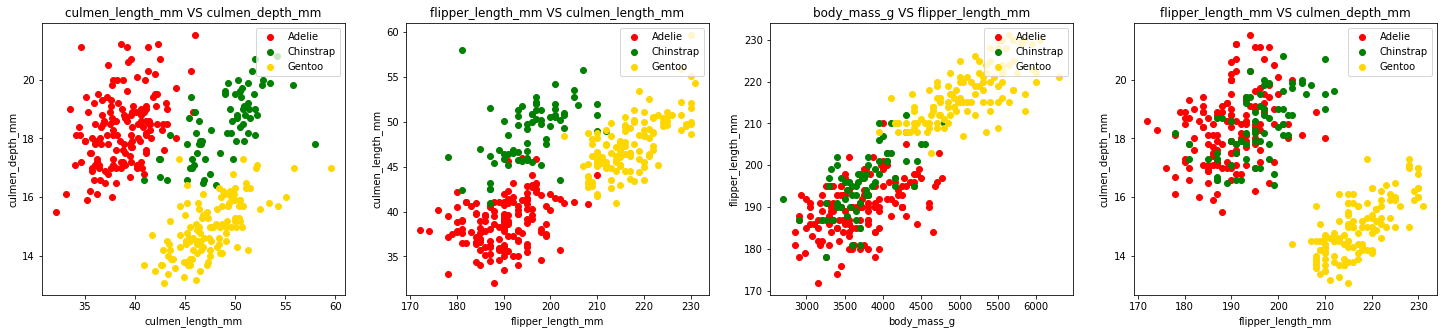

In [11]:
featurePairs = [['culmen_length_mm', 'culmen_depth_mm'], ['flipper_length_mm', 'culmen_length_mm'], 
                ['body_mass_g', 'flipper_length_mm'], ['flipper_length_mm', 'culmen_depth_mm']]
species = np.unique(data_set['species'])
size = 5
fig, axs = plt.subplots(1, len(featurePairs), figsize=(5*size, size))       
for ax,pairs in zip(axs,featurePairs):
  feature1, feature2 = pairs
  plot_features(feature1, feature2, data_set, species, ax)
plt.show()
plt.close()




**Clean Data**

In [12]:

from scipy import stats
indices = list(data_set.columns)
for ind in indices:
  mode = stats.mode(data_set[ind])
  data_set[ind].fillna(mode[0][0], inplace=True)
data_set.info

<bound method DataFrame.info of     species     island  ...  body_mass_g     sex
0    Adelie  Torgersen  ...       3750.0    MALE
1    Adelie  Torgersen  ...       3800.0  FEMALE
2    Adelie  Torgersen  ...       3250.0  FEMALE
3    Adelie  Torgersen  ...       3800.0    MALE
4    Adelie  Torgersen  ...       3450.0  FEMALE
..      ...        ...  ...          ...     ...
339  Gentoo     Biscoe  ...       3800.0    MALE
340  Gentoo     Biscoe  ...       4850.0  FEMALE
341  Gentoo     Biscoe  ...       5750.0    MALE
342  Gentoo     Biscoe  ...       5200.0  FEMALE
343  Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]>

**GMM**

In [14]:
 component_number = 3
 models = []
 for pairs in featurePairs:
    feature1, feature2 = pairs
    model = estimate_dist(feature1, feature2, data_set, species, component_number)
    models.append(model)

**Plot Contours**

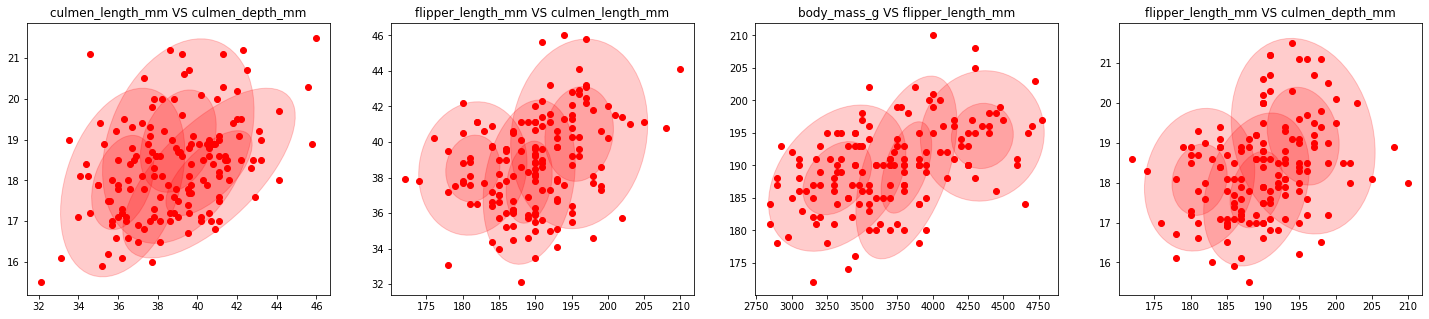

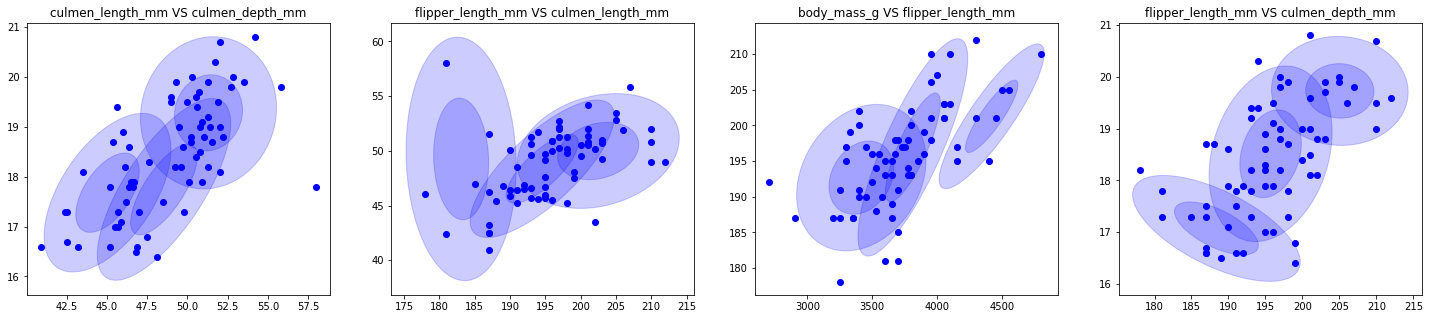

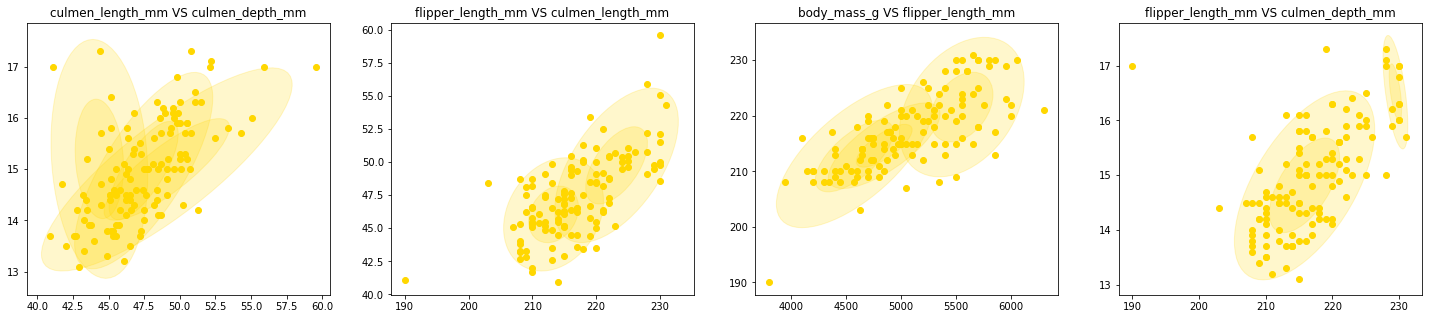

In [15]:
i = 0
colors = ['r', 'b', 'gold']
_species = np.copy(species)
_colors = np.copy(colors)
for j in range(1,len(species)+1):
  fig, axs = plt.subplots(1, len(featurePairs), figsize=(5*size, size))
  for pairs, ax in zip(featurePairs, axs):
    feature1, feature2 = pairs
    plot_data_dist(data_set[['species',feature1, feature2]],_colors, _species, models[i][j-1], ax, arr = False)
    ax.set_title(feature1 + " VS "+ feature2)
    i = i+1
  if(j<len(species)):
    _species[0] = species[j]
    _colors[0] = colors[j]
  i = 0

**Parameters**

In [16]:
r = 3
for i in range(np.shape(models)[1]):
  print("Class:",i)
  plotTable({1:["Mean ", "Cov Matrix"], 
            2:[np.round(models[0][i].means_, decimals =r), np.round(models[0][i].covariances_, decimals =r)],
            3:[np.round(models[1][i].means_, decimals =r), np.round(models[1][i].covariances_, decimals =r)],
            4:[np.round(models[2][i].means_, decimals =r), np.round(models[2][i].covariances_, decimals =r)],
            5:[np.round(models[3][i].means_, decimals =r), np.round(models[3][i].covariances_, decimals =r)]}, 
            ['Param Name', 'Features_I', 'Features_II', 'Features_III', 'Features_IV'], 5)

Class: 0
╒══════════════╤═══════════════════╤═════════════════════╤═══════════════════════════════════╤═════════════════════╕
│  Param Name  │    Features_I     │     Features_II     │           Features_III            │     Features_IV     │
╞══════════════╪═══════════════════╪═════════════════════╪═══════════════════════════════════╪═════════════════════╡
│     Mean     │ [[39.037 18.965]  │ [[196.056  40.455]  │       [[4351.435  194.534]        │ [[189.094  17.826]  │
│              │  [36.232 17.949]  │  [189.166  37.742]  │        [3323.649  188.042]        │  [195.531  19.16 ]  │
│              │  [40.585 18.179]] │  [181.401  38.509]] │        [3813.762  189.685]]       │  [181.253  18.071]] │
├──────────────┼───────────────────┼─────────────────────┼───────────────────────────────────┼─────────────────────┤
│  Cov Matrix  │  [[[3.648 0.712]  │  [[[22.293  1.308]  │  [[[4.8052693e+04 5.5188000e+01]  │  [[[13.247  0.979]  │
│              │   [0.712 1.572]]  │   [ 1.308  7.108]]

**BIC & AIC**

In [ ]:
def calc_bic(models,feature1, feature2, data_set,species):
  bic = []
  for model, label in zip(models, species):
    data = data_set[data_set['species']==label]
    data = data[[feature1, feature2]].values
    bic_tmp = model.bic(data)
    bic.append(bic_tmp)
  return bic

In [ ]:
def calc_aic(models,feature1, feature2, data_set,species):
  bic = []
  for model, label in zip(models, species):
    data = data_set[data_set['species']==label]
    data = data[[feature1, feature2]].values
    bic_tmp = model.aic(data)
    bic.append(bic_tmp)
  return bic

In [ ]:
  bic1 = []; bic2 = []; bic3 = []; aic1 = []; aic2 = []; aic3 = []
  for component_number in range(1,6):
          pairs  = featurePairs[0]
          feature1, feature2 = pairs
          models = estimate_dist(feature1, feature2, data_set, species, component_number)
          bic_tmp = calc_bic(models,feature1, feature2, data_set,species)
          aic_tmp = calc_aic(models,feature1, feature2, data_set,species)
          bic1.append(bic_tmp[0]); bic2.append(bic_tmp[1]); bic3.append(bic_tmp[2])
          aic1.append(aic_tmp[0]); aic2.append(aic_tmp[1]); aic3.append(aic_tmp[2])

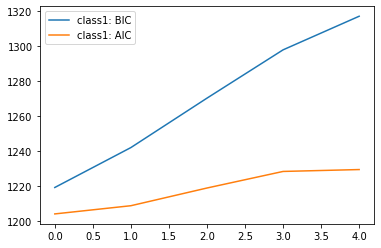

In [ ]:
plt.plot(bic1, label = "class1: BIC")
plt.plot(aic1, label = "class1: AIC")
plt.legend()
plt.show(); plt.close()


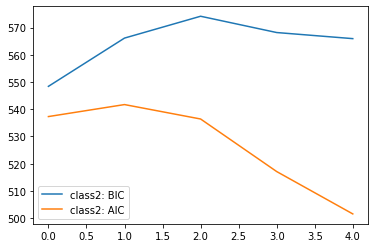

In [ ]:
plt.plot(bic2, label = "class2: BIC")
plt.plot(aic2, label = "class2: AIC")
plt.legend()
plt.show(); plt.close()


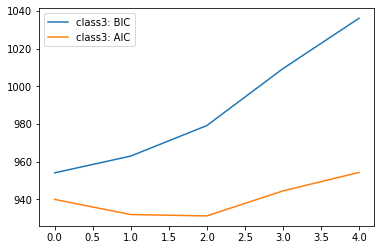

In [ ]:
plt.plot(bic3, label = "class3: BIC")
plt.plot(aic3, label = "class3: AIC")
plt.legend()
plt.show(); plt.close()


In [79]:
k = 2
label = species[k]
score = []
for i in range(len(featurePairs)):
    f1,f2 = featurePairs[i]
    sub_models = models[i][k]
    data = data_set[data_set['species'] == label]
    cost = model.score(data[[f1, f2]].values)
    score.append(cost)



In [81]:
print(np.max(score))


-3.6351699717305377


**Calc AIC**